In [1]:
#Basic libraries
import warnings
import tensorflow as ts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler

In [2]:
dataset= pd.read_csv('C:/Users/Belayneh/Desktop/diabetes_012.csv')

In [3]:
print('number of columns', dataset.shape[0])
print('number of rows', dataset.shape[1])

number of columns 253680
number of rows 22


In [4]:
dataset.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
dataset.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1
253679,2,1,1,1,25,0,0,1,1,1,...,1,0,2,0,0,0,0,9,6,2


In [6]:
print(f"Data has {dataset.shape[0]} Rows and {dataset.shape[1]} Features")
print(dataset.head())

Data has 253680 Rows and 22 Features
   Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0       1         1          1   40       1       0   
1             0       0         0          0   25       1       0   
2             0       1         1          1   28       0       0   
3             0       1         0          1   27       0       0   
4             0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1  

In [7]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [9]:
dataset.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
dataset.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [11]:
dataset.dtypes
for x in dataset:
    if dataset[x].dtypes == "float64":
        dataset[x] = dataset[x].astype(int)
        print (dataset[x].dtypes)

In [12]:
dataset.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [13]:
# Shows the columns with their number of catagories each variable is having
for col in dataset.columns:
    print(col, ':', len(dataset[col].unique()), 'catagories')

Diabetes_012 : 3 catagories
HighBP : 2 catagories
HighChol : 2 catagories
CholCheck : 2 catagories
BMI : 84 catagories
Smoker : 2 catagories
Stroke : 2 catagories
HeartDiseaseorAttack : 2 catagories
PhysActivity : 2 catagories
Fruits : 2 catagories
Veggies : 2 catagories
HvyAlcoholConsump : 2 catagories
AnyHealthcare : 2 catagories
NoDocbcCost : 2 catagories
GenHlth : 5 catagories
MentHlth : 31 catagories
PhysHlth : 31 catagories
DiffWalk : 2 catagories
Sex : 2 catagories
Age : 13 catagories
Education : 6 catagories
Income : 8 catagories


In [14]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
dataset[numerical_features].sample(5)

Number of numerical variables:  22


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
192748,1,0,0,1,29,0,0,0,1,1,...,1,0,2,0,0,0,0,10,4,4
114399,0,1,1,1,29,0,0,0,1,1,...,1,0,4,10,30,1,0,9,6,8
152092,0,1,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
244983,0,0,1,1,30,0,0,0,1,1,...,1,0,3,0,0,0,1,5,4,6
112291,0,1,1,1,33,0,0,0,1,1,...,1,0,2,0,21,1,0,9,4,7


In [15]:
#Check categorical and numerical features

In [16]:
cat=[]
num=[]
for column in dataset.columns:
    if dataset[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)

In [17]:
cat

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Education',
 'Income']

In [18]:
num

['BMI', 'MentHlth', 'PhysHlth', 'Age']

In [19]:
for i in dataset:
    print(i)
    print(dataset[i].value_counts())
    print('---------------------------------')

Diabetes_012
Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
---------------------------------
HighBP
HighBP
0    144851
1    108829
Name: count, dtype: int64
---------------------------------
HighChol
HighChol
0    146089
1    107591
Name: count, dtype: int64
---------------------------------
CholCheck
CholCheck
1    244210
0      9470
Name: count, dtype: int64
---------------------------------
BMI
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64
---------------------------------
Smoker
Smoker
0    141257
1    112423
Name: count, dtype: int64
---------------------------------
Stroke
Stroke
0    243388
1     10292
Name: count, dtype: int64
---------------------------------
HeartDiseaseorAttack
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64
---------------------------------
PhysActivity
PhysActivity
1    191920
0 

In [20]:
dataset.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [21]:
# Check Missing values

In [22]:
dataset.isnull().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [23]:
dataset.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [24]:
#Check and remove redundancy

In [25]:
dataset.duplicated().sum()

23899

In [26]:
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677    False
253678    False
253679    False
Length: 253680, dtype: bool

In [27]:
dataset.drop_duplicates(inplace=True)

In [28]:
dataset.duplicated().sum()

0

In [29]:
dataset.shape

(229781, 22)

In [30]:
dataset.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [31]:
#Inconsistency avoidances

In [32]:
filtered_records = dataset[(dataset['CholCheck'] == 0) & (dataset['HighChol'] == 1)]

In [33]:
filtered_records

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
409,0,0,1,0,26,0,0,0,0,1,...,1,1,3,0,0,0,0,5,4,5
470,0,1,1,0,33,0,0,0,1,1,...,0,1,4,11,20,1,0,7,4,1
893,0,1,1,0,41,1,0,0,0,0,...,1,0,4,0,0,0,1,8,2,8
1128,0,0,1,0,27,0,0,0,1,0,...,1,0,2,0,0,0,1,8,6,8
1336,0,1,1,0,39,1,0,0,0,0,...,1,0,3,0,30,1,0,11,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253064,1,1,1,0,32,0,0,0,0,0,...,1,0,4,0,0,1,1,8,5,2
253136,0,0,1,0,28,0,0,0,1,0,...,1,0,2,0,2,0,0,4,5,4
253242,0,0,1,0,28,0,0,0,0,1,...,1,0,3,0,0,0,1,4,5,3
253414,0,1,1,0,24,0,0,0,1,0,...,1,0,3,0,0,0,0,6,6,4


In [34]:
dataset = dataset.drop(dataset[(dataset['CholCheck'] == 0) & (dataset['HighChol'] == 1)].index)

In [35]:
dataset.shape

(227804, 22)

In [36]:
# Transformation

In [37]:
dataset['Education'] = pd.cut(x=dataset['Education'], bins=[0, 1, 2, 4, 6],
                    labels=['0', '1', '2','3']) # 4 interval
dataset['Education'].value_counts()

Education
3    153692
2     69947
1      3994
0       171
Name: count, dtype: int64

In [38]:
dataset['Education'] = dataset['Education'].astype('int')

In [39]:
dataset['Income'] = pd.cut(x=dataset['Income'], bins=[0, 3, 7, 8],
                    labels=['0', '1', '2']) # 4 interval
dataset['Income'].value_counts()

Income
1    119431
2     71359
0     37014
Name: count, dtype: int64

In [40]:
dataset['Income'] = dataset['Income'].astype('int')

In [41]:
dataset['BMI'].value_counts()

BMI
27    21354
26    17644
24    16387
28    14808
25    14687
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64

In [42]:
dataset['BMI'] = pd.cut(x=dataset['BMI'], bins=[0, 18.5, 25, 30, 98],
                    labels=['0', '1', '2','3']) # 4 interval
dataset['BMI'].value_counts()

BMI
2    80827
1    73087
3    70861
0     3029
Name: count, dtype: int64

In [43]:
dataset['BMI'] = dataset['BMI'].astype('int')

In [44]:
dataset.loc[dataset.PhysHlth !=0 ,'PhysHlth'] = 1;
dataset['PhysHlth'].value_counts()

PhysHlth
0    135696
1     92108
Name: count, dtype: int64

In [45]:
dataset.loc[dataset.MentHlth !=0 ,'MentHlth'] = 1;
dataset['MentHlth'].value_counts()

MentHlth
0    151458
1     76346
Name: count, dtype: int64

In [46]:
# Rename columns

In [47]:
dataset.rename(columns={'Diabetes_012': 'diabetes'}, inplace=True)

In [48]:
#Feature construction

In [49]:
v1=[]
dataset.insert(14,'health_issue','NaN')

In [50]:
dataset['health_issue']=dataset['MentHlth'] + dataset['PhysHlth']
# is there any types of violence ?  yes =1, else no =0
dataset.loc[dataset.health_issue ==0 ,'health_issue'] = 0
dataset.loc[dataset.health_issue !=0 ,'health_issue'] = 1;
dataset['health_issue'].value_counts()

health_issue
1    125032
0    102772
Name: count, dtype: int64

In [51]:
dataset.drop(['MentHlth','PhysHlth'],  inplace=True, axis = 1)

In [52]:
#dataset.to_csv('D:/PhD/Data Science/final_dataset.csv')

In [54]:
dataset= pd.read_csv('D:/PhD/Data Science/final_dataset.csv', sep = ',', index_col = 'id')

In [55]:
dataset.shape

(227804, 21)

In [56]:
# Pearson Correlation Coefficient:

In [57]:
# Calculate Pearson correlation matrix
pearson_corr_matrix = dataset.corr()
# Print the correlation matrix
print(pearson_corr_matrix)

                      diabetes    HighBP  HighChol  CholCheck       BMI  \
diabetes              1.000000  0.262262  0.207308   0.073744  0.209571   
HighBP                0.262262  1.000000  0.288495   0.117903  0.208477   
HighChol              0.207308  0.288495  1.000000   0.160513  0.110779   
CholCheck             0.073744  0.117903  0.160513   1.000000  0.050322   
BMI                   0.209571  0.208477  0.110779   0.050322  1.000000   
Smoker                0.047376  0.074398  0.073620   0.004215 -0.003266   
Stroke                0.100075  0.124340  0.090488   0.029374  0.010400   
HeartDiseaseorAttack  0.170356  0.201072  0.178803   0.051529  0.045895   
PhysActivity         -0.103838 -0.103941 -0.062482  -0.011995 -0.114236   
Fruits               -0.025846 -0.019482 -0.024359   0.010425 -0.068726   
Veggies              -0.043388 -0.042906 -0.026937  -0.003491 -0.044291   
HvyAlcoholConsump    -0.067103 -0.014562 -0.020305  -0.019006 -0.058578   
AnyHealthcare         0.0

In [58]:
# Spearman Rank Correlation:

In [59]:
from scipy.stats import spearmanr
# Calculate Spearman rank correlation coefficient
spearman_corr, _ = spearmanr(dataset)
# Print the correlation matrix
print(spearman_corr)

[[ 1.00000000e+00  2.62176779e-01  2.08829135e-01  7.45109408e-02
   2.11398387e-01  4.72019534e-02  9.86600542e-02  1.68538712e-01
  -1.03541858e-01 -2.56112693e-02 -4.33894433e-02 -6.66717699e-02
   2.37533574e-02  2.59339118e-02  5.54494752e-02  2.81444157e-01
   2.09961224e-01  3.18990231e-02  1.83623665e-01 -8.86374476e-02
  -1.36027878e-01]
 [ 2.62176779e-01  1.00000000e+00  2.88494689e-01  1.17902525e-01
   2.09447757e-01  7.43978575e-02  1.24339974e-01  2.01072207e-01
  -1.03941375e-01 -1.94815995e-02 -4.29059670e-02 -1.45618538e-02
   5.32647305e-02  1.23986327e-03  2.98685985e-02  2.74657908e-01
   2.11527361e-01  4.71254045e-02  3.37423075e-01 -9.87207274e-02
  -1.32718108e-01]
 [ 2.08829135e-01  2.88494689e-01  1.00000000e+00  1.60512628e-01
   1.10430112e-01  7.36197533e-02  9.04876335e-02  1.78803336e-01
  -6.24818471e-02 -2.43586121e-02 -2.69373174e-02 -2.03049575e-02
   5.94679008e-02 -1.83075132e-03  4.89392619e-02  1.88821058e-01
   1.37547009e-01  2.15810609e-02  2.5

In [60]:
# Kendall Rank Correlation:

In [61]:
from scipy.stats import kendalltau
# Calculate Kendall rank correlation coefficient for all pairs of columns
kendall_corr_matrix = dataset.corr(method='kendall')
# Print the correlation matrix
print(kendall_corr_matrix)

                      diabetes    HighBP  HighChol  CholCheck       BMI  \
diabetes              1.000000  0.259877  0.206998   0.073857  0.196865   
HighBP                0.259877  1.000000  0.288495   0.117903  0.196723   
HighChol              0.206998  0.288495  1.000000   0.160513  0.103721   
CholCheck             0.073857  0.117903  0.160513   1.000000  0.047447   
BMI                   0.196865  0.196723  0.103721   0.047447  1.000000   
Smoker                0.046788  0.074398  0.073620   0.004215 -0.002172   
Stroke                0.097795  0.124340  0.090488   0.029374  0.010774   
HeartDiseaseorAttack  0.167061  0.201072  0.178803   0.051529  0.043975   
PhysActivity         -0.102634 -0.103941 -0.062482  -0.011995 -0.109445   
Fruits               -0.025387 -0.019482 -0.024359   0.010425 -0.065207   
Veggies              -0.043009 -0.042906 -0.026937  -0.003491 -0.042328   
HvyAlcoholConsump    -0.066087 -0.014562 -0.020305  -0.019006 -0.055779   
AnyHealthcare         0.0

In [62]:
# Check the significance

In [63]:
# ANOVA (Analysis of Variance): One-way ANOVA analysis

In [64]:
dataset.columns

Index(['diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'health_issue',
       'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [65]:
from scipy.stats import f_oneway

# Assuming these columns are the features you want to compare
features = ['diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
            'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'health_issue', 'GenHlth', 'DiffWalk',
            'Sex', 'Education', 'Income']

# List to store significant features
significant_features = []

# Perform one-way ANOVA for each feature using 'Age' as the grouping column
grouping_column = 'Age'
for feature in features:
    result = f_oneway(*[group[1][feature] for group in dataset.groupby(grouping_column)])

    # Check the p-value to determine significance
    if result.pvalue < 0.05:
        print(f"The difference in {feature} is statistically significant.")
        significant_features.append(feature)

# List significant features
print("Significant features:", significant_features)


The difference in diabetes is statistically significant.
The difference in HighBP is statistically significant.
The difference in HighChol is statistically significant.
The difference in CholCheck is statistically significant.
The difference in BMI is statistically significant.
The difference in Smoker is statistically significant.
The difference in Stroke is statistically significant.
The difference in HeartDiseaseorAttack is statistically significant.
The difference in PhysActivity is statistically significant.
The difference in Fruits is statistically significant.
The difference in Veggies is statistically significant.
The difference in HvyAlcoholConsump is statistically significant.
The difference in AnyHealthcare is statistically significant.
The difference in NoDocbcCost is statistically significant.
The difference in health_issue is statistically significant.
The difference in GenHlth is statistically significant.
The difference in DiffWalk is statistically significant.
The diff

In [66]:
# Chi-square Test:

In [67]:
from scipy.stats import chi2_contingency
# List of columns to compare with 'diabetes'
columns_to_compare = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                       'health_issue', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']
# Results dictionary to store p-values
p_values = {}
# Perform chi-squared test for each column
for column in columns_to_compare:
    contingency_table = pd.crosstab(dataset['diabetes'], dataset[column])
    result = chi2_contingency(contingency_table)
    p_values[column] = result[1]
# Print the p-values
print("P-values for chi-squared test:")
for column, p_value in p_values.items():
    print(f"{column}: {p_value}")
# Check the p-values to determine significance (you can adjust the significance level as needed)
significant_features = [column for column, p_value in p_values.items() if p_value < 0.05]
print("Significant features:", significant_features)

P-values for chi-squared test:
HighBP: 0.0
HighChol: 0.0
CholCheck: 1.742004519862693e-275
BMI: 0.0
Smoker: 7.191160869169764e-112
Stroke: 0.0
HeartDiseaseorAttack: 0.0
PhysActivity: 0.0
Fruits: 8.929135090202578e-34
Veggies: 3.285340201326584e-94
HvyAlcoholConsump: 1.7166881536262494e-223
AnyHealthcare: 1.067574671601202e-30
NoDocbcCost: 6.373757707510293e-41
health_issue: 1.9447239142074355e-154
GenHlth: 0.0
DiffWalk: 0.0
Sex: 6.243472016109423e-55
Education: 0.0
Income: 0.0
Significant features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'health_issue', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income']


In [68]:
from scipy.stats import chi2_contingency
# List of features to test against 'diabetes'
features_to_test = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'health_issue', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
# Results dictionary to store p-values
p_values = {}
# Perform chi-squared test for each feature
for feature in features_to_test:
    contingency_table = pd.crosstab(dataset['diabetes'], dataset[feature])
    result = chi2_contingency(contingency_table)
    p_values[feature] = result[1]
# Print the p-values
print("P-values for chi-squared test:")
for feature, p_value in p_values.items():
    print(f"{feature}: {p_value}")
# Check the p-values to determine significance (you can adjust the significance level as needed)
significant_features = [feature for feature, p_value in p_values.items() if p_value < 0.05]
print("Significant features:", significant_features)

P-values for chi-squared test:
HighBP: 0.0
HighChol: 0.0
CholCheck: 1.742004519862693e-275
BMI: 0.0
Smoker: 7.191160869169764e-112
Stroke: 0.0
HeartDiseaseorAttack: 0.0
PhysActivity: 0.0
Fruits: 8.929135090202578e-34
Veggies: 3.285340201326584e-94
HvyAlcoholConsump: 1.7166881536262494e-223
AnyHealthcare: 1.067574671601202e-30
NoDocbcCost: 6.373757707510293e-41
health_issue: 1.9447239142074355e-154
GenHlth: 0.0
DiffWalk: 0.0
Sex: 6.243472016109423e-55
Age: 0.0
Education: 0.0
Income: 0.0
Significant features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'health_issue', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [69]:
# Multicollinearity between features

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Add a constant term for the intercept in the VIF calculation
X = add_constant(dataset.drop(columns=['diabetes']))
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Display the VIF values
print(vif_data)

                Variable         VIF
0                  const  100.239746
1                 HighBP    1.304754
2               HighChol    1.177914
3              CholCheck    1.045252
4                    BMI    1.110031
5                 Smoker    1.067603
6                 Stroke    1.075857
7   HeartDiseaseorAttack    1.166532
8           PhysActivity    1.124255
9                 Fruits    1.096332
10               Veggies    1.096548
11     HvyAlcoholConsump    1.025348
12         AnyHealthcare    1.099979
13           NoDocbcCost    1.120163
14          health_issue    1.172969
15               GenHlth    1.552174
16              DiffWalk    1.398297
17                   Sex    1.080358
18                   Age    1.346142
19             Education    1.164989
20                Income    1.288315


In [71]:
# Multicollinearity for numerical features

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
dataset= pd.read_csv('C:/Users/Belayneh/Desktop/diabetes_012.csv')
# Assuming 'diabetes' is the target variable
target_variable = 'Diabetes_012'
# Separate numerical and categorical features
cat = []
num = []
for column in dataset.columns:
    if dataset[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)
# Check if the target variable is in the list of numerical features
if target_variable in num:
    num.remove(target_variable)
# Calculate VIF for numerical features
X_numerical = add_constant(dataset[num])
vif_data_numerical = pd.DataFrame()
vif_data_numerical["Variable"] = X_numerical.columns
vif_data_numerical["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]
# Display the VIF values for numerical features
print("VIF for numerical features:")
print(vif_data_numerical)

VIF for numerical features:
   Variable        VIF
0     const  27.543674
1       BMI   1.018944
2  MentHlth   1.166456
3  PhysHlth   1.178683
4       Age   1.031066


In [73]:
# Multicollinearity for Both categorical and numerical features

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Assuming 'Diabetes_012' is the target variable
target_variable = 'Diabetes_012'
# Read the dataset
dataset = pd.read_csv('C:/Users/Belayneh/Desktop/diabetes_012.csv')
# Separate numerical and categorical features
cat = []
num = []
for column in dataset.columns:
    if dataset[column].nunique() > 10:
        num.append(column)
    else:
        cat.append(column)
# Check if the target variable is in the list of numerical features
if target_variable in num:
    num.remove(target_variable)
# Calculate VIF for numerical features
X_numerical = add_constant(dataset[num])
vif_data_numerical = pd.DataFrame()
vif_data_numerical["Variable"] = X_numerical.columns
vif_data_numerical["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]
# Display the VIF values for numerical features
print("VIF for numerical features:")
print(vif_data_numerical)
# Calculate VIF for categorical features
X_categorical = pd.get_dummies(dataset[cat], drop_first=True)  # Convert categorical to dummy variables
X_categorical = add_constant(X_categorical)
vif_data_categorical = pd.DataFrame()
vif_data_categorical["Variable"] = X_categorical.columns
vif_data_categorical["VIF"] = [variance_inflation_factor(X_categorical.values, i) for i in range(X_categorical.shape[1])]
# Display the VIF values for categorical features
print("\nVIF for categorical features:")
print(vif_data_categorical)

VIF for numerical features:
   Variable        VIF
0     const  27.543674
1       BMI   1.018944
2  MentHlth   1.166456
3  PhysHlth   1.178683
4       Age   1.031066

VIF for categorical features:
                Variable        VIF
0                  const  88.864593
1           Diabetes_012   1.182181
2                 HighBP   1.243795
3               HighChol   1.148665
4              CholCheck   1.032561
5                 Smoker   1.081092
6                 Stroke   1.077168
7   HeartDiseaseorAttack   1.158597
8           PhysActivity   1.147059
9                 Fruits   1.100889
10               Veggies   1.112066
11     HvyAlcoholConsump   1.022123
12         AnyHealthcare   1.100753
13           NoDocbcCost   1.109136
14               GenHlth   1.568593
15              DiffWalk   1.381196
16                   Sex   1.066674
17             Education   1.322427
18                Income   1.492035


In [75]:
# Multicollinearity between features

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# Assuming 'diabetes' is the target variable
dataset= pd.read_csv('D:/PhD/Data Science/final_dataset.csv', sep = ',', index_col = 'id')
target_variable = 'diabetes'
# Add a constant term for the intercept in the VIF calculation
X = add_constant(dataset.drop(columns=[target_variable]))
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Display the VIF values
print(vif_data)
# Print whether each feature is significant based on VIF
significant_features = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
if not significant_features:
    print("No features have significant multicollinearity.")
else:
    print("Features with significant multicollinearity:", significant_features)

                Variable         VIF
0                  const  100.239746
1                 HighBP    1.304754
2               HighChol    1.177914
3              CholCheck    1.045252
4                    BMI    1.110031
5                 Smoker    1.067603
6                 Stroke    1.075857
7   HeartDiseaseorAttack    1.166532
8           PhysActivity    1.124255
9                 Fruits    1.096332
10               Veggies    1.096548
11     HvyAlcoholConsump    1.025348
12         AnyHealthcare    1.099979
13           NoDocbcCost    1.120163
14          health_issue    1.172969
15               GenHlth    1.552174
16              DiffWalk    1.398297
17                   Sex    1.080358
18                   Age    1.346142
19             Education    1.164989
20                Income    1.288315
Features with significant multicollinearity: ['const']


In [78]:
# Model Development

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score, precision_score,recall_score,f1_score

In [81]:
# Assume that 'Diabetes_012' is the target variable
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize the StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Iterate over the splits
for train_index, test_index in stratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

Original Accuracy: 0.7713614714339018


In [86]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [87]:
# Iterate through each feature and evaluate the model after leaving out each feature
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, dt_model.predict(X_test_loco))
    print(f"Accuracy with remaining features after LOCO for {feature}: {loco_accuracy[feature]}")

Accuracy with remaining features after LOCO for HighBP: 0.7829064331336011
Accuracy with remaining features after LOCO for HighChol: 0.7724808498496522
Accuracy with remaining features after LOCO for CholCheck: 0.7711639340664165
Accuracy with remaining features after LOCO for BMI: 0.7779241017536929
Accuracy with remaining features after LOCO for Smoker: 0.775246372994447
Accuracy with remaining features after LOCO for Stroke: 0.7734246394943043
Accuracy with remaining features after LOCO for HeartDiseaseorAttack: 0.7745220693136674
Accuracy with remaining features after LOCO for PhysActivity: 0.7760804196571629
Accuracy with remaining features after LOCO for Fruits: 0.7766510831632317
Accuracy with remaining features after LOCO for Veggies: 0.7763877000065845
Accuracy with remaining features after LOCO for HvyAlcoholConsump: 0.7715590088013872
Accuracy with remaining features after LOCO for AnyHealthcare: 0.7722613638857795
Accuracy with remaining features after LOCO for NoDocbcCost:

In [88]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")


LOCO Accuracies:
HighBP: Impact = -0.011544961699699319
HighChol: Impact = -0.0011193784157503828
CholCheck: Impact = 0.00019753736748528983
BMI: Impact = -0.006562630319791096
Smoker: Impact = -0.0038849015605452175
Stroke: Impact = -0.0020631680604025204
HeartDiseaseorAttack: Impact = -0.0031605978797656364
PhysActivity: Impact = -0.004718948223261132
Fruits: Impact = -0.005289611729329957
Veggies: Impact = -0.005026228572682756
HvyAlcoholConsump: Impact = -0.00019753736748540085
AnyHealthcare: Impact = -0.0008998924518777152
NoDocbcCost: Impact = -0.0033361866508636595
health_issue: Impact = -0.003753209982221617
GenHlth: Impact = -0.004038541735256085
DiffWalk: Impact = -0.00546520050042798
Sex: Impact = -0.004587256644937643
Age: Impact = -0.005245714536555424
Education: Impact = -0.0033142380544765038
Income: Impact = -0.004543359452163109


In [89]:
# Scenario 2: Removal-Based Explanations

In [90]:
# Iterate through each feature and evaluate the model after removing each feature
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0 # Replace the feature with a constant (e.g., 0)
    removal_accuracy[feature] = accuracy_score(y_test, dt_model.predict(X_test_removed))
    print(f"Accuracy with remaining features after Removal for {feature}: {removal_accuracy[feature]}")

Accuracy with remaining features after Removal for HighBP: 0.7829064331336011
Accuracy with remaining features after Removal for HighChol: 0.7813041855973311
Accuracy with remaining features after Removal for CholCheck: 0.776256008428261
Accuracy with remaining features after Removal for BMI: 0.7652817102346305
Accuracy with remaining features after Removal for Smoker: 0.7716907003797108
Accuracy with remaining features after Removal for Stroke: 0.7734465880906916
Accuracy with remaining features after Removal for HeartDiseaseorAttack: 0.7741708917714712
Accuracy with remaining features after Removal for PhysActivity: 0.756743706239986
Accuracy with remaining features after Removal for Fruits: 0.7612212199029872
Accuracy with remaining features after Removal for Veggies: 0.7524198327516955
Accuracy with remaining features after Removal for HvyAlcoholConsump: 0.771207831259191
Accuracy with remaining features after Removal for AnyHealthcare: 0.7412918943833542
Accuracy with remaining fe

In [91]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")


Removal-Based Explanations Accuracies:
HighBP: Impact = -0.011544961699699319
HighChol: Impact = -0.00994271416342929
CholCheck: Impact = -0.0048945369943592665
BMI: Impact = 0.0060797611992712275
Smoker: Impact = -0.0003292289458090014
Stroke: Impact = -0.002085116656789787
HeartDiseaseorAttack: Impact = -0.0028094203375694793
PhysActivity: Impact = 0.014617765193915777
Fruits: Impact = 0.010140251530914579
Veggies: Impact = 0.01894163868220622
HvyAlcoholConsump: Impact = 0.0001536401747107563
AnyHealthcare: Impact = 0.03006957705054758
NoDocbcCost: Impact = -0.0026118829700840784
health_issue: Impact = 0.0018875792893043863
GenHlth: Impact = -0.017361339742323567
DiffWalk: Impact = -0.0017119905182063633
Sex: Impact = -0.0027216259520204122
Age: Impact = -0.00994271416342929
Education: Impact = 0.06736024231250404
Income: Impact = 0.03353745527973484


In [92]:
print("Accuracy Score:", round(accuracy_score(y_test, dt_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, dt_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, dt_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

Accuracy Score: 77.14
precision score: 75.48
recall score: 77.14
Roc curve: 90.48
f1 score: 76.25


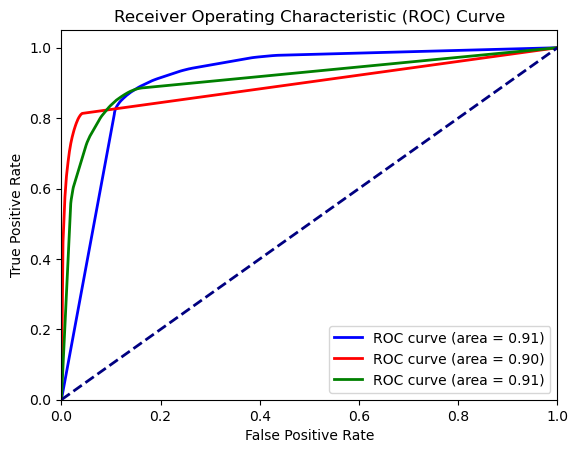

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
# Assuming rf_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)
# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], dt_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], dt_model.predict_proba(X)[:, i])
# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [93]:
# permutation_importance

In [94]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(dt_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)


Permutation Importance:
                 Feature  Importance
14               GenHlth    0.012642
17                   Age    0.008315
3                    BMI    0.006518
19                Income    0.005230
15              DiffWalk    0.004813
1               HighChol    0.003540
6   HeartDiseaseorAttack    0.002609
16                   Sex    0.002324
8                 Fruits    0.001984
0                 HighBP    0.001865
18             Education    0.001639
13          health_issue    0.001527
7           PhysActivity    0.001441
12           NoDocbcCost    0.000815
11         AnyHealthcare    0.000723
9                Veggies    0.000609
10     HvyAlcoholConsump    0.000504
5                 Stroke    0.000239
2              CholCheck    0.000009
4                 Smoker   -0.000509


# Random Forest

In [95]:
# Train the Random Forest classifier using the pipeline
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

Original Accuracy: 0.8083887535392111


In [97]:
print("Accuracy Score:", round(accuracy_score(y_test, rf_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, rf_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, rf_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, rf_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, rf_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

Accuracy Score: 80.84
precision score: 76.5
recall score: 80.84
Roc curve: 93.46
f1 score: 78.14


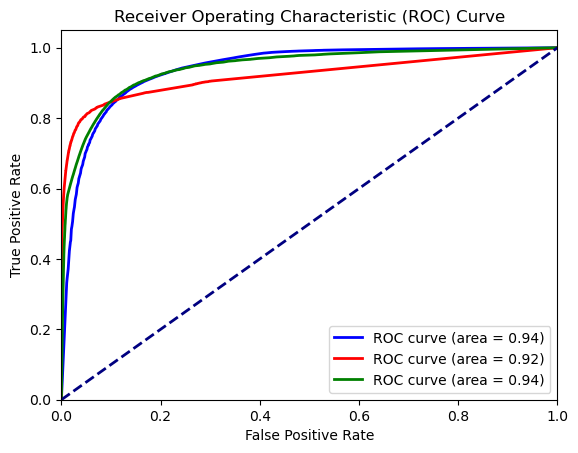

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
# Assuming rf_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)
# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], rf_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], rf_model.predict_proba(X)[:, i])
# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# SHAP

In [93]:
#Importing shap module
import shap
#intialize JS visualization
shap.initjs()

In [ ]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = dt_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
#We will use below rows for prediction explanations using lime and shap
row = [100, 150,200, 250,300]

In [ ]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

In [ ]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
import lime
import lime.lime_tabular
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],

)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], dt_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming dt_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], dt_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], dt_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Train a CatBoost classifier
cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

In [ ]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [ ]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, cat_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

In [ ]:
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, cat_model.predict(X_test_loco))
    print(f"Accuracy with remaining features after LOCO for {feature}: {loco_accuracy[feature]}")

In [ ]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
# Scenario 2: Removal-Based Explanations

In [ ]:
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0
    removal_accuracy[feature] = accuracy_score(y_test, cat_model.predict(X_test_removed))
    print(f"Accuracy with remaining features after Removal for {feature}: {removal_accuracy[feature]}")

In [ ]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
print("Accuracy Score:", round(accuracy_score(y_test, cat_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, cat_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, cat_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, cat_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, cat_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

In [ ]:
# permutation_importance 

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(cat_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)

# SHAP

In [ ]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = cat_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

In [ ]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],

)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], cat_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming cat_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], cat_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], cat_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Train an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

In [ ]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [ ]:
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, xgb_model.predict(X_test_loco))
    print(f"Accuracy with remaining features after LOCO for {feature}: {loco_accuracy[feature]}")

In [ ]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
# Scenario 2: Removal-Based Explanations

In [ ]:
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0
    removal_accuracy[feature] = accuracy_score(y_test, xgb_model.predict(X_test_removed))
    print(f"Accuracy with remaining features after Removal for {feature}: {removal_accuracy[feature]}")

In [ ]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
print("Accuracy Score:", round(accuracy_score(y_test, xgb_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, xgb_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, xgb_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, xgb_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, xgb_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

In [ ]:
# permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)

# SHAPE 

In [ ]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = xgb_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

In [ ]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],

)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], xgb_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming xgb_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], xgb_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], xgb_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Train a LightGBM classifier
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, lgb_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

In [ ]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [ ]:
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, lgb_model.predict(X_test_loco))
    print(f"Accuracy with remaining features after LOCO for {feature}: {loco_accuracy[feature]}")

In [ ]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
# Scenario 2: Removal-Based Explanations

In [ ]:
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0
    removal_accuracy[feature] = accuracy_score(y_test, lgb_model.predict(X_test_removed))
    print(f"Accuracy with remaining features after Removal for {feature}: {removal_accuracy[feature]}")

In [ ]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
print("Accuracy Score:", round(accuracy_score(y_test, lgb_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, lgb_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, lgb_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, lgb_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, lgb_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

# permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(lgb_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)

# SHAP

In [ ]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = lgb_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

In [ ]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],

)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], lgb_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming lgb_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], lgb_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], lgb_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# RandomForestClassifier

In [ ]:
# Train the Random Forest classifier using the pipeline
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

In [ ]:
print("Accuracy Score:", round(accuracy_score(y_test, rf_model.predict(X_test)) * 100, 2))
print("precision score:", round(precision_score(y_test, rf_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("recall score:", round(recall_score(y_test, rf_model.predict(X_test), pos_label='positive', average='weighted') * 100, 2))
print("Roc curve:",roc_auc_score(y, rf_model.predict_proba(X), multi_class='ovr').round(4)*100)
import sklearn.metrics as metrics
print("f1 score:", metrics.f1_score(y_test, rf_model.predict(X_test), pos_label='positive', average='weighted').round(4) * 100)

# permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=42)
# Get the permutation importance scores
perm_importance_scores = perm_importance.importances_mean
# Create a DataFrame to display feature names and their importance scores
perm_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance_scores})
# Sort the DataFrame by importance scores in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
# Display the permutation importance results
print("\nPermutation Importance:")
print(perm_importance_df)

# SHAP

In [ ]:
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = rf_model, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)

In [ ]:
#Shap decision plot
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

In [ ]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')

In [ ]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

In [ ]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')

# LIME

In [ ]:
# importing Lime
#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["0","1","2"],

)

In [ ]:
#Explanations using lime
for i in row:
    print("for row :",i," the real value is ", y_test.iloc[i])
    exp = lime_explainer.explain_instance(X_test.iloc[i], rf_model.predict_proba, num_features=5)
    exp.show_in_notebook(show_table=True)

In [ ]:
from sklearn.impute               
import SimpleImputer
from sklearn.pipeline 
import make_pipeline

In [ ]:
# Create a pipeline with imputation and Random Forest classification
rf_model = make_pipeline(
    SimpleImputer(strategy='mean', missing_values=np.nan),
    RandomForestClassifier(random_state=42)
)

In [ ]:
# Train the Random Forest classifier using the pipeline
rf_model.fit(X_train, y_train)

In [ ]:
# Evaluate the model on the original test set
original_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Original Accuracy:", original_accuracy)

In [ ]:
# Scenario 1: Leave-One-Column-Out (LOCO)

In [ ]:
# Iterate through each feature and evaluate the model after leaving out each feature
loco_accuracy = {}
for feature in X.columns:
    X_test_loco = X_test.copy()
    X_test_loco[feature] = np.nan
    loco_accuracy[feature] = accuracy_score(y_test, rf_model.predict(X_test_loco))

In [ ]:
# Display LOCO accuracies
print("\nLOCO Accuracies:")
for feature, accuracy in loco_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
# Scenario 2: Removal-Based Explanations

In [ ]:
# Iterate through each feature and evaluate the model after removing each feature
removal_accuracy = {}
for feature in X.columns:
    X_test_removed = X_test.copy()
    X_test_removed[feature] = 0  # Replace the feature with a constant (e.g., 0)
    removal_accuracy[feature] = accuracy_score(y_test, rf_model.predict(X_test_removed))

In [ ]:
# Display Removal-Based Explanations accuracies
print("\nRemoval-Based Explanations Accuracies:")
for feature, accuracy in removal_accuracy.items():
    impact = original_accuracy - accuracy
    print(f"{feature}: Impact = {impact}")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming rf_model is your model and X, y are your data and labels
# Assuming y has three classes (0, 1, and 2)

# Binarize the labels
y_bin = label_binarize(y, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], rf_model.predict_proba(X)[:, i])
    roc_auc[i] = roc_auc_score(y_bin[:, i], rf_model.predict_proba(X)[:, i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
models = [dt_model, rf_model, cat_model, xgb_model, lgb_model]
model_names = ['Decision Tree', 'Random Forest', 'CatBoost', 'XGBoost', 'LGBMBoost']
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
plt.figure(figsize=(10, 8))
for model, name in zip(models, model_names):
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming dt_model, rf_model, cat_model, xgb_model, and lgb_model are your trained models
# Assuming X_test and y_test are your test data and labels
# Assuming y_test has three classes (0, 1, and 2)

# Define a dictionary of models
models = {'Decision Tree': dt_model,
          'Random Forest': rf_model,
          'CatBoost': cat_model,
          'XGBoost': xgb_model,
          'LightGBM': lgb_model}

# Iterate over each model
for model_name, model in models.items():
    # Predict probabilities
    y_score = model.predict_proba(X_test)

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = roc_auc_score(y_test_bin.ravel(), y_score.ravel())

    # Plot micro-average ROC curve for each model
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], color='blue', lw=2, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for {}'.format(model_name))
    plt.legend(loc="lower right")
    plt.show()


# Accuracy graph

In [ ]:
models = [dt_model, rf_model, cat_model, xgb_model, lgb_model]
model_names = ['Decision Tree', 'Random Forest', 'CatBoost', 'XGBoost', 'LGBMBoost']
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
# Evaluate and plot accuracy for each model
accuracies = []
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'{name} Accuracy: {accuracy:.2%}')
# Plotting the accuracies
plt.figure(figsize=(7, 6))
bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
# Display accuracy values on the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{acc:.2%}', fontsize=9)
plt.ylim([0.0, 1.0])
plt.show()

In [ ]:
# LOCO impacts
loco_impacts = {
    'HighBP':  0.002392397006211522,
    'HighChol': 0.003489826825574527,
    'CholCheck': -4.38971927744225e-05,
    'BMI':  0.01207172801299361,
    'Smoker': -0.000636509295230514,
    'Stroke':  0.0020412194640153647,
    'HeartDiseaseorAttack': 0.0023265512170497216,
    'PhysActivity': -2.194859638715574e-05,
    'Fruits':  -0.0001536401747107563,
    'Veggies': -2.194859638715574e-05,
    'HvyAlcoholConsump':  0.004675051030486599,
    'AnyHealthcare':  -0.00030728034942162363,
    'NoDocbcCost':  0.0015802989398828737,
    'health_issue': -2.194859638715574e-05,
    'GenHlth':  0.049252650293013844,
    'DiffWalk':  0.0022387568315006545,
    'Sex':  0.00147055595794654,
    'Age':  0.00294111191589308,
    'Education': -0.00030728034942162363,
    'Income': 0.0003511775421962682
    # ... (include impacts for all features)
}
# Removal-Based Explanation impacts
removal_impacts = {
    'HighBP': 0.003753209982221728,
    'HighChol': 0.002919163319505813,
    'CholCheck': 0.004192181909966952,
    'BMI': 0.00526766313294269,
    'Smoker': 0.0015144531507210734,
    'Stroke': -0.00013169157832348954,
    'HeartDiseaseorAttack': -4.38971927744225e-05,
    'PhysActivity': -0.00030728034942162363,
    'Fruits': -0.0001536401747107563,
    'Veggies': -0.00030728034942162363,
    'HvyAlcoholConsump': 0.00024143456025993437,
    'AnyHealthcare': 0.01053532626588538,
    'NoDocbcCost': 0.00015364017471086733,
    'health_issue': 0.0007243036807796921,
    'GenHlth': 0.00340203244002546,
    'DiffWalk': 0.00019753736748540085,
    'Sex': 0.00046092052413249096,
    'Age': 0.007330831193345211,
    'Education': 0.03656636158117699,
    'Income': 0.0007023550843924253
    # ... (include impacts for all features)
}
# Extract feature names and their impacts
features = list(loco_impacts.keys())
loco_values = list(loco_impacts.values())
removal_values = list(removal_impacts.values())
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(features, loco_values, label='LOCO Impact', marker='o')
plt.plot(features, removal_values, label='Removal Impact', marker='o')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero line for reference
plt.title('Feature Impacts - LOCO vs Removal-Based Explanation')
plt.xlabel('Features')
plt.ylabel('Impact on Accuracy')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# LOCO impacts
loco_impacts = {
    'HighBP':  0.002392397006211522,
    'HighChol': 0.003489826825574527,
    'CholCheck': -4.38971927744225e-05,
    'BMI':  0.01207172801299361,
    'Smoker': -0.000636509295230514,
    'Stroke':  0.0020412194640153647,
    'HeartDiseaseorAttack': 0.0023265512170497216,
    'PhysActivity': -2.194859638715574e-05,
    'Fruits':  -0.0001536401747107563,
    'Veggies': -2.194859638715574e-05,
    'HvyAlcoholConsump':  0.004675051030486599,
    'AnyHealthcare':  -0.00030728034942162363,
    'NoDocbcCost':  0.0015802989398828737,
    'health_issue': -2.194859638715574e-05,
    'GenHlth':  0.049252650293013844,
    'DiffWalk':  0.0022387568315006545,
    'Sex':  0.00147055595794654,
    'Age':  0.00294111191589308,
    'Education': -0.00030728034942162363,
    'Income': 0.0003511775421962682
    # ... (include impacts for all features)
}
# Removal-Based Explanation impacts
removal_impacts = {
    'HighBP': 0.003753209982221728,
    'HighChol': 0.002919163319505813,
    'CholCheck': 0.004192181909966952,
    'BMI': 0.00526766313294269,
    'Smoker': 0.0015144531507210734,
    'Stroke': -0.00013169157832348954,
    'HeartDiseaseorAttack': -4.38971927744225e-05,
    'PhysActivity': -0.00030728034942162363,
    'Fruits': -0.0001536401747107563,
    'Veggies': -0.00030728034942162363,
    'HvyAlcoholConsump': 0.00024143456025993437,
    'AnyHealthcare': 0.01053532626588538,
    'NoDocbcCost': 0.00015364017471086733,
    'health_issue': 0.0007243036807796921,
    'GenHlth': 0.00340203244002546,
    'DiffWalk': 0.00019753736748540085,
    'Sex': 0.00046092052413249096,
    'Age': 0.007330831193345211,
    'Education': 0.03656636158117699,
    'Income': 0.0007023550843924253
    # ... (include impacts for all features)
}
# Extract feature names and their impacts
features = list(loco_impacts.keys())
loco_values = list(loco_impacts.values())
removal_values = list(removal_impacts.values())
# Plotting LOCO impacts
plt.figure(figsize=(12, 6))
plt.bar(features, loco_values, color='blue', alpha=0.7)
plt.title('Feature Impacts - LOCO')
plt.xlabel('Features')
plt.ylabel('Impact on Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Plotting Removal-Based Explanation impacts
plt.figure(figsize=(12, 6))
plt.bar(features, removal_values, color='green', alpha=0.7)
plt.title('Feature Impacts - Removal-Based Explanation')
plt.xlabel('Features')
plt.ylabel('Impact on Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()